In [3]:
# All the imports

from __future__ import print_function, division
import keras
from keras.datasets import mnist
from keras.layers import Input, Dense, Reshape, Flatten, Dropout, multiply, GaussianNoise
from keras.layers import BatchNormalization, Activation, Embedding, ZeroPadding2D
from keras.layers import MaxPooling2D, merge
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import UpSampling2D, Conv2D
from keras.models import Sequential, Model
from keras.optimizers import Adam
from keras import losses
from keras.utils import to_categorical
import keras.backend as K
import matplotlib.pyplot as plt
import numpy as np
import glob

from keras import backend as K
from keras.layers import Layer

import copy

import os
import skimage.io as io
import skimage.transform as trans
import numpy as np
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, ReduceLROnPlateau, Callback, TensorBoard
from keras import backend as keras

from scipy.io import loadmat
from scipy.io import savemat

from scipy.ndimage import zoom
#from scipy.misc import imresize
import pywt

import csv
import random
import time
%matplotlib inline  

import pywt
#import hdf5storage

import scipy.io as sio
from skimage.filters import threshold_otsu

#import pylidc as pl
#from keras.backend.tensorflow_backend import set_session
import tensorflow as tf

import pywt
import numpy as np
#import pydicom
import matplotlib.pyplot as plt
import SimpleITK as sitk
import skimage.io as io
#from sklearn.decomposition import PCA
import collections, numpy
import warnings
from scipy import ndimage, misc
warnings.filterwarnings('ignore')

#import pymrt as mrt
#import pymrt.geometry
import ipyvolume as ipv
import copy




#from image_gen import ImageDataGenerator
#from load_data import loadDataMontgomery, loadDataJSRT
#from build_model import build_UNet2D_4L

import pandas as pd
from keras.utils.vis_utils import plot_model
from keras.callbacks import ModelCheckpoint



import numpy
import warnings
from keras.layers import Convolution3D, Input, merge, RepeatVector, Activation
from keras.models import Model
from keras.layers.advanced_activations import PReLU
from keras import activations, initializers, regularizers
from keras.engine import Layer, InputSpec
from keras.utils.conv_utils import conv_output_length
#from keras.utils.np_utils import conv_output_length
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
import keras.backend as K
from keras.engine.topology import Layer
import functools
import tensorflow as tf
import pickle
import time

Using TensorFlow backend.


In [26]:
# He12lper Functions

def unet_3d_prelu(input_size = (104, 56, 40, 1)):
    
    filter1 = 16
    filter2 = 32
    filter3 = 64
    filter4 = 128
    
    zfilter = 40
    
    inputs = Input(input_size)
    
    conv1 = Conv3D(filter1, (3, 3, zfilter), padding = 'same', kernel_initializer = 'he_normal')(inputs)
    conv1 = ReLU()(conv1)
    conv1 = BatchNormalization()(conv1)
    
    conv1 = Conv3D(filter1, (3, 3, zfilter), padding = 'same', kernel_initializer = 'he_normal')(conv1)
    conv1 = ReLU()(conv1)
    conv1 = BatchNormalization()(conv1)
    
    pool1 = MaxPooling3D(pool_size=(2,2,2))(conv1)
    conv2 = Conv3D(filter2, 3,  padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = ReLU()(conv2)
    conv2 = BatchNormalization()(conv2)
    
    pool2 = MaxPooling3D(pool_size=(2, 2,2))(conv2)
    conv3 = Conv3D(filter3, 3,  padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = ReLU()(conv3)
    conv3 = BatchNormalization()(conv3)
    
    pool3 = MaxPooling3D(pool_size=(2, 2,2))(conv3)
    conv4 = Conv3D(filter3, 3,  padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv4 = ReLU()(conv4)
    conv4 = BatchNormalization()(conv4)

    up3    = UpSampling3D(size = (2,2,2))(conv4)
    merge3 = Add()([up3, conv3])
    merge3 = Conv3D(filter2, 3,  padding = 'same', kernel_initializer = 'he_normal')(merge3)
    merge3 = ReLU()(merge3)
    merge3 = BatchNormalization()(merge3)    
    
    up2    = UpSampling3D(size = (2,2,2))(merge3)
    merge2 = Add()([up2, conv2])
    merge2 = Conv3D(filter1, 3,  padding = 'same', kernel_initializer = 'he_normal')(merge2)
    merge2 = ReLU()(merge2)
    merge2 = BatchNormalization()(merge2)    
    
    up1    = UpSampling3D(size = (2,2,2))(merge2)
    merge1 = Add()([up1, conv1])
    merge1 = Conv3D(filter1, (3, 3, zfilter),  padding = 'same', kernel_initializer = 'he_normal')(merge1)
    merge1 = ReLU()(merge1)
    merge1 = BatchNormalization()(merge1)    
    
    up7 = Conv3D(filter1, (3, 3, zfilter),  padding = 'same', kernel_initializer = 'he_normal')(merge1)
    up7 = ReLU()(up7)
    
    up7 = Conv3D(filter1, (3, 3, zfilter),  padding = 'same', kernel_initializer = 'he_normal')(merge1)
    up7 = ReLU()(up7)
    
    up7 = Conv3D(filter1, (3, 3, zfilter),  padding = 'same', kernel_initializer = 'he_normal')(merge1)
    up7 = ReLU()(up7)
    
    conv9 = Conv3D(1, 1, padding='same', kernel_initializer = 'he_normal')(up7)
    conv9 = ReLU()(conv9)
    
    model = Model(input = inputs, output = conv9)

    model.compile(optimizer = Adam(lr = 0.0001), loss = 'mean_absolute_error', 
                  metrics = ['mse'])
    
    return model

def unet_3d_prelu2(input_size = (56, 56, 40, 1)):
    
    filter1 = 16
    filter2 = 32
    filter3 = 128
    
    zfilter = 3
    
    inputs = Input(input_size)
    
    conv1 = Conv3D(filter1, (3, 3, 3), padding = 'same', kernel_initializer = 'he_normal')(inputs)
    conv1 = Dropout(0.1)(conv1)
    conv1 = ReLU()(conv1)
    conv1 = BatchNormalization()(conv1)
    
    #conv1 = Conv3D(filter1, (3, 3, zfilter), padding = 'same', kernel_initializer = 'he_normal')(conv1)
    #conv1 = ReLU()(conv1)
    #conv1 = BatchNormalization()(conv1)
    
    pool1 = MaxPooling3D(pool_size=(2,2,2))(conv1)
    conv2 = Conv3D(filter2, (3, 3, 3),  padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = Dropout(0.1)(conv2)
    conv2 = ReLU()(conv2)
    conv2 = BatchNormalization()(conv2)
    
    pool2 = MaxPooling3D(pool_size=(2, 2,2))(conv2)
    conv3 = Conv3D(filter3, (3, 3, 10),  padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = Dropout(0.2)(conv3)
    conv3 = ReLU()(conv3)
    conv3 = BatchNormalization()(conv3)
    
    pool3 = MaxPooling3D(pool_size=(2, 2,2))(conv3)
    conv4 = Conv3D(filter3, (3, 3, 5),  padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv4 = Dropout(0.2)(conv4)
    conv4 = ReLU()(conv4)
    conv4 = BatchNormalization()(conv4)

    up3    = UpSampling3D(size = (2,2,2))(conv4)
    merge3 = Concatenate()([up3, conv3])
    merge3 = Conv3D(filter2, (3, 3, 10),  padding = 'same', kernel_initializer = 'he_normal')(merge3)
    merge3 = Dropout(0.1)(merge3)
    merge3 = ReLU()(merge3)
    merge3 = BatchNormalization()(merge3)    
    
    up2    = UpSampling3D(size = (2,2,2))(merge3)
    merge2 = Concatenate()([up2, conv2])
    merge2 = Conv3D(filter1, 3,  padding = 'same', kernel_initializer = 'he_normal')(merge2)
    merge2 = Dropout(0.1)(merge2)
    merge2 = ReLU()(merge2)
    merge2 = BatchNormalization()(merge2)    
    
    up1    = UpSampling3D(size = (2,2,2))(merge2)
    merge1 = Concatenate()([up1, conv1])
    merge1 = Conv3D(filter1, (3, 3, 3),  padding = 'same', kernel_initializer = 'he_normal')(merge1)
    merge1 = Dropout(0.1)(merge1)
    merge1 = ReLU()(merge1)
    #merge1 = BatchNormalization()(merge1)    
    
#     up7 = Conv3D(filter1, (3, 3, zfilter),  padding = 'same', kernel_initializer = 'he_normal')(merge1)
#     up7 = ReLU()(up7)
#     up7 = BatchNormalization()(up7)
    
#     up8 = Conv3D(filter1, (3, 3, zfilter),  padding = 'same', kernel_initializer = 'he_normal')(up7)
#     up8 = ReLU()(up8)
#     up8 = BatchNormalization()(up8)
    
#     up8 = Add()([up8, merge1])
    
#     up9 = Conv3D(filter1, (3, 3, zfilter),  padding = 'same', kernel_initializer = 'he_normal')(up8)
#     up9 = ReLU()(up9)
    
    conv9 = Conv3D(1, 1, padding='same', kernel_initializer = 'he_normal')(merge1)
    conv9 = ReLU()(conv9)
    
    model = Model(input = inputs, output = conv9)

    model.compile(optimizer = Adam(lr = 0.0005), loss = 'mean_absolute_error', 
                  metrics = ['mse'])
    return model

def unet_3d_prelu1(input_size = (104, 56, 40, 1)):
    filter1 = 16
    filter2 = 32
    filter3 = 64
    filter4 = 128
    zfilter = 40
    
    model = load_model('/media/dril/ubuntudata/DBT-NEW/models/model2.h5', compile=False)
    x     = model.layers[-3].output
    
    up7 = Conv3D(filter1, (3, 3, zfilter),  padding = 'same', kernel_initializer = 'he_normal')(x)
    up7 = ReLU()(up7)
    
    up7 = Conv3D(filter1, (3, 3, zfilter),  padding = 'same', kernel_initializer = 'he_normal')(up7)
    up7 = ReLU()(up7)
    
    conv9 = Conv3D(1, 1, padding='same', kernel_initializer = 'he_normal')(up7)
    conv9 = ReLU()(conv9)
    
    model1 = Model(input = model.input, output = conv9)
    model1.compile(optimizer = Adam(lr = 0.0001), loss = 'mse', metrics = ['mae'])
    
    model3 =  load_model('/media/dril/ubuntudata/DBT-NEW/models/model2.h5', compile=False)
    
    for i in range(len(model3.layers)-2):
        if len(model3.layers[i].get_weights()) > 0:
            model1.layers[i].set_weights(model3.layers[i].get_weights())
    
    return model1

def bbox2_3D(img):

    r = np.any(img, axis=(1, 2))
    c = np.any(img, axis=(0, 2))
    z = np.any(img, axis=(0, 1))

    rmin, rmax = np.where(r)[0][[0, -1]]
    cmin, cmax = np.where(c)[0][[0, -1]]
    zmin, zmax = np.where(z)[0][[0, -1]]

    return rmin, rmax, cmin, cmax, zmin, zmax

# For checking if weights are same or not of two networks

# for i in range(40):
#     w1 = model3.layers[i].get_weights()
#     w2 = m2.layers[i].get_weights()
    
#     for j in range(len(w1)):
#         print(i, np.all(w1[j] == w2[j]))

In [ ]:
# For getting the shapes

allshapesx = []
allshapesy = []
allshapesz = []

for i in range(1, 177):
    a = loadmat('/media/dril/ubuntudata/attenuation_values/'+str(i)+'.mat')
    a = a['head']
    b = copy.deepcopy(a)
    a[a != 0 ] = 1
    rmin, rmax, cmin, cmax, zmin, zmax = bbox2_3D(a)
    b = b[rmin:rmax, cmin:cmax, zmin:zmax]
    
    allshapesx.append(b.shape[0])
    allshapesy.append(b.shape[1])
    allshapesz.append(b.shape[2])
    
    temp = int((800-b.shape[0])/2)
    vol = b
    vol = np.pad(b, ((temp, 800-temp-b.shape[0]), (320-b.shape[1], 0), (0, 448-b.shape[2])), 
                     'constant', constant_values=(0, 0))
    vol = np.moveaxis(vol, [1, 2], [2, 1]).astype(np.single)

    h = {}
    h['head'] = vol
    savemat('/media/dril/ubuntudata/attenuation_values_cropped/'+str(i)+'.mat', h,
            do_compression=True)
    print(i, vol.shape)

In [ ]:
# New size will be 800, 320, 448

In [ ]:
# For reading the data for training the 3D U-Net model

trainx = []
trainy = []
valx   = []
valy   = []

for i in range(1, 177):
    volx = loadmat('/media/dril/ubuntudata/DBT-NEW/recons/sart_cir_zero_'+str(i)+'.mat')
    voly = loadmat('/media/dril/ubuntudata/DBT-NEW/attenuation_values_cropped/'+str(i)+'.mat')
    
    volx = volx['xartt']
    voly = voly['head']
    
    voly = ndimage.zoom(voly, 0.0625, order=1).astype(np.single)
    volx = ndimage.zoom(volx, 0.125, order=1).astype(np.single)
    
    if i <= 140:
        trainx.append(np.expand_dims(volx, axis=-1))
        trainy.append(np.expand_dims(voly, axis=-1))
    else:
        valx.append(np.expand_dims(volx,axis=-1))
        valy.append(np.expand_dims(voly,axis=-1))

trainx = np.array(trainx)
trainy = np.array(trainy)
valx   = np.array(valx)
valy   = np.array(valy)

# trainx  = np.pad(trainx, ((0,0), (2, 2), (0, 0), (0, 0), (0, 0)), 'constant', constant_values = (0, 0))
# trainy  = np.pad(trainy, ((0,0), (2, 2), (0, 0), (0, 0), (0, 0)), 'constant', constant_values = (0, 0))
# valx    = np.pad(valx, ((0,0), (2, 2), (0, 0), (0, 0), (0, 0)), 'constant', constant_values = (0, 0))
# valy    = np.pad(valy, ((0,0), (2, 2), (0, 0), (0, 0), (0, 0)), 'constant', constant_values = (0, 0))

print(trainx.shape, trainy.shape)
print(valx.shape, valy.shape)

In [ ]:
# For reading the data for training the 3D U-Net model in small patches

trainx = []
trainy = []
valx   = []
valy   = []

for i in range(1, 177):
    print(i)
    volx = loadmat('/media/dril/ubuntudata/DBT-NEW/recons/sart_cir_zero_'+str(i)+'.mat')
    voly = loadmat('/media/dril/ubuntudata/DBT-NEW/attenuation_values_cropped/'+str(i)+'.mat')
    
    volx = volx['xartt']
    voly = voly['head']
    
    voly = ndimage.zoom(voly, 0.125, order=1).astype(np.single)
    volx = ndimage.zoom(volx, 0.250, order=1).astype(np.single)
    
    #print(volx.shape)
    x1 = volx[:50, :, :]
    x2 = volx[50:, :, :]
    x3 = volx[25:75, :, :]
    x4 = volx[35:85, :, :]
    x5 = volx[15:65, :, :]
    
    y1 = voly[:50, :, :]
    y2 = voly[50:, :, :]
    y3 = voly[25:75, :, :]
    y4 = voly[35:85, :, :]
    y5 = voly[15:65, :, :]
        
    if i <= 140:
        trainx.append(np.expand_dims(x1, axis=-1))
        trainx.append(np.expand_dims(x2, axis=-1))
        trainx.append(np.expand_dims(x3, axis=-1))
        trainx.append(np.expand_dims(x4, axis=-1))
        trainx.append(np.expand_dims(x5, axis=-1))
        
        trainy.append(np.expand_dims(y1, axis=-1))
        trainy.append(np.expand_dims(y2, axis=-1))
        trainy.append(np.expand_dims(y3, axis=-1))
        trainy.append(np.expand_dims(y4, axis=-1))
        trainy.append(np.expand_dims(y5, axis=-1))
    else:
        valx.append(np.expand_dims(x1, axis=-1))
        valx.append(np.expand_dims(x2, axis=-1))
        valx.append(np.expand_dims(x3, axis=-1))
        valx.append(np.expand_dims(x4, axis=-1))
        valx.append(np.expand_dims(x5, axis=-1))
        
        valy.append(np.expand_dims(y1, axis=-1))
        valy.append(np.expand_dims(y2, axis=-1))
        valy.append(np.expand_dims(y3, axis=-1))
        valy.append(np.expand_dims(y4, axis=-1))
        valy.append(np.expand_dims(y5, axis=-1))

trainx = np.array(trainx)
trainy = np.array(trainy)
valx   = np.array(valx)
valy   = np.array(valy)

trainx  = np.pad(trainx, ((0,0), (3, 3), (0, 0), (0, 0), (0, 0)), 'constant', constant_values = (0, 0))
trainy  = np.pad(trainy, ((0,0), (3, 3), (0, 0), (0, 0), (0, 0)), 'constant', constant_values = (0, 0))
valx    = np.pad(valx, ((0,0), (3, 3), (0, 0), (0, 0), (0, 0)), 'constant', constant_values = (0, 0))
valy    = np.pad(valy, ((0,0), (3, 3), (0, 0), (0, 0), (0, 0)), 'constant', constant_values = (0, 0))

print(trainx.shape, trainy.shape)
print(valx.shape, valy.shape)

In [27]:
# For training the U-Net model

checkpoint  = ModelCheckpoint(filepath='/media/dril/ubuntudata/DBT-NEW/models/model15-dril.h5', 
                              monitor='val_loss', period=10, 
                              verbose=1, save_best_only=True, mode='min')
model = unet_3d_prelu2()
print(model.summary())
model.fit(trainx, trainy, validation_data=(valx, valy), 
          batch_size=4, 
          epochs=1500, callbacks=[checkpoint])

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           (None, 56, 56, 40, 1 0                                            
__________________________________________________________________________________________________
conv3d_81 (Conv3D)              (None, 56, 56, 40, 1 448         input_11[0][0]                   
__________________________________________________________________________________________________
dropout_71 (Dropout)            (None, 56, 56, 40, 1 0           conv3d_81[0][0]                  
__________________________________________________________________________________________________
re_lu_57 (ReLU)                 (None, 56, 56, 40, 1 0           dropout_71[0][0]                 
__________________________________________________________________________________________________
batch_norm

Train on 700 samples, validate on 180 samples
Epoch 1/1500
700/700 [==============================] - 17s 24ms/step - loss: 0.1057 - mean_squared_error: 0.0494 - val_loss: 0.1237 - val_mean_squared_error: 0.0586
Epoch 2/1500
700/700 [==============================] - 13s 19ms/step - loss: 0.0641 - mean_squared_error: 0.0200 - val_loss: 0.0522 - val_mean_squared_error: 0.0206
Epoch 3/1500
700/700 [==============================] - 13s 19ms/step - loss: 0.0560 - mean_squared_error: 0.0163 - val_loss: 0.0475 - val_mean_squared_error: 0.0190
Epoch 4/1500
700/700 [==============================] - 13s 19ms/step - loss: 0.0495 - mean_squared_error: 0.0136 - val_loss: 0.0370 - val_mean_squared_error: 0.0121
Epoch 5/1500
700/700 [==============================] - 13s 18ms/step - loss: 0.0452 - mean_squared_error: 0.0120 - val_loss: 0.0343 - val_mean_squared_error: 0.0106
Epoch 6/1500
700/700 [==============================] - 13s 19ms/step - loss: 0.0416 - mean_squared_error: 0.0106 - val_loss

700/700 [==============================] - 13s 18ms/step - loss: 0.0197 - mean_squared_error: 0.0044 - val_loss: 0.0244 - val_mean_squared_error: 0.0075
Epoch 48/1500
700/700 [==============================] - 13s 19ms/step - loss: 0.0196 - mean_squared_error: 0.0044 - val_loss: 0.0250 - val_mean_squared_error: 0.0080
Epoch 49/1500
700/700 [==============================] - 13s 19ms/step - loss: 0.0196 - mean_squared_error: 0.0044 - val_loss: 0.0244 - val_mean_squared_error: 0.0076
Epoch 50/1500
700/700 [==============================] - 13s 18ms/step - loss: 0.0195 - mean_squared_error: 0.0043 - val_loss: 0.0246 - val_mean_squared_error: 0.0077

Epoch 00050: val_loss improved from 0.02492 to 0.02464, saving model to /media/dril/ubuntudata/DBT-NEW/models/model15-dril.h5
Epoch 51/1500
700/700 [==============================] - 13s 19ms/step - loss: 0.0195 - mean_squared_error: 0.0043 - val_loss: 0.0243 - val_mean_squared_error: 0.0076
Epoch 52/1500
700/700 [=============================

700/700 [==============================] - 13s 19ms/step - loss: 0.0178 - mean_squared_error: 0.0037 - val_loss: 0.0241 - val_mean_squared_error: 0.0074
Epoch 93/1500
700/700 [==============================] - 13s 19ms/step - loss: 0.0177 - mean_squared_error: 0.0037 - val_loss: 0.0246 - val_mean_squared_error: 0.0076
Epoch 94/1500
700/700 [==============================] - 13s 19ms/step - loss: 0.0178 - mean_squared_error: 0.0037 - val_loss: 0.0244 - val_mean_squared_error: 0.0075
Epoch 95/1500
700/700 [==============================] - 13s 19ms/step - loss: 0.0179 - mean_squared_error: 0.0037 - val_loss: 0.0250 - val_mean_squared_error: 0.0077
Epoch 96/1500
700/700 [==============================] - 13s 19ms/step - loss: 0.0182 - mean_squared_error: 0.0038 - val_loss: 0.0243 - val_mean_squared_error: 0.0074
Epoch 97/1500
700/700 [==============================] - 13s 19ms/step - loss: 0.0177 - mean_squared_error: 0.0037 - val_loss: 0.0239 - val_mean_squared_error: 0.0072
Epoch 98/150

700/700 [==============================] - 13s 19ms/step - loss: 0.0171 - mean_squared_error: 0.0034 - val_loss: 0.0239 - val_mean_squared_error: 0.0072
Epoch 140/1500
700/700 [==============================] - 13s 19ms/step - loss: 0.0172 - mean_squared_error: 0.0035 - val_loss: 0.0238 - val_mean_squared_error: 0.0072

Epoch 00140: val_loss improved from 0.02389 to 0.02380, saving model to /media/dril/ubuntudata/DBT-NEW/models/model15-dril.h5
Epoch 141/1500
700/700 [==============================] - 13s 19ms/step - loss: 0.0172 - mean_squared_error: 0.0035 - val_loss: 0.0242 - val_mean_squared_error: 0.0075
Epoch 142/1500
700/700 [==============================] - 13s 19ms/step - loss: 0.0171 - mean_squared_error: 0.0034 - val_loss: 0.0238 - val_mean_squared_error: 0.0072
Epoch 143/1500
700/700 [==============================] - 13s 19ms/step - loss: 0.0170 - mean_squared_error: 0.0034 - val_loss: 0.0241 - val_mean_squared_error: 0.0074
Epoch 144/1500
700/700 [========================

Epoch 186/1500
700/700 [==============================] - 13s 19ms/step - loss: 0.0168 - mean_squared_error: 0.0033 - val_loss: 0.0237 - val_mean_squared_error: 0.0072
Epoch 187/1500
700/700 [==============================] - 13s 19ms/step - loss: 0.0167 - mean_squared_error: 0.0033 - val_loss: 0.0239 - val_mean_squared_error: 0.0074
Epoch 188/1500
700/700 [==============================] - 13s 19ms/step - loss: 0.0168 - mean_squared_error: 0.0033 - val_loss: 0.0237 - val_mean_squared_error: 0.0072
Epoch 189/1500
700/700 [==============================] - 13s 19ms/step - loss: 0.0167 - mean_squared_error: 0.0033 - val_loss: 0.0238 - val_mean_squared_error: 0.0072
Epoch 190/1500
700/700 [==============================] - 13s 18ms/step - loss: 0.0167 - mean_squared_error: 0.0033 - val_loss: 0.0238 - val_mean_squared_error: 0.0073

Epoch 00190: val_loss improved from 0.02380 to 0.02380, saving model to /media/dril/ubuntudata/DBT-NEW/models/model15-dril.h5
Epoch 191/1500
700/700 [=========

700/700 [==============================] - 13s 19ms/step - loss: 0.0165 - mean_squared_error: 0.0032 - val_loss: 0.0239 - val_mean_squared_error: 0.0073
Epoch 233/1500
700/700 [==============================] - 13s 19ms/step - loss: 0.0165 - mean_squared_error: 0.0032 - val_loss: 0.0241 - val_mean_squared_error: 0.0074
Epoch 234/1500
700/700 [==============================] - 13s 19ms/step - loss: 0.0165 - mean_squared_error: 0.0032 - val_loss: 0.0238 - val_mean_squared_error: 0.0073
Epoch 235/1500
700/700 [==============================] - 13s 19ms/step - loss: 0.0166 - mean_squared_error: 0.0032 - val_loss: 0.0238 - val_mean_squared_error: 0.0073
Epoch 236/1500
700/700 [==============================] - 13s 19ms/step - loss: 0.0165 - mean_squared_error: 0.0032 - val_loss: 0.0237 - val_mean_squared_error: 0.0072
Epoch 237/1500
700/700 [==============================] - 13s 19ms/step - loss: 0.0165 - mean_squared_error: 0.0032 - val_loss: 0.0238 - val_mean_squared_error: 0.0072
Epoch 2

700/700 [==============================] - 13s 19ms/step - loss: 0.0163 - mean_squared_error: 0.0032 - val_loss: 0.0238 - val_mean_squared_error: 0.0073
Epoch 280/1500
700/700 [==============================] - 13s 19ms/step - loss: 0.0163 - mean_squared_error: 0.0032 - val_loss: 0.0238 - val_mean_squared_error: 0.0074

Epoch 00280: val_loss did not improve from 0.02363
Epoch 281/1500
700/700 [==============================] - 13s 19ms/step - loss: 0.0163 - mean_squared_error: 0.0032 - val_loss: 0.0238 - val_mean_squared_error: 0.0073
Epoch 282/1500
700/700 [==============================] - 13s 19ms/step - loss: 0.0163 - mean_squared_error: 0.0032 - val_loss: 0.0239 - val_mean_squared_error: 0.0073
Epoch 283/1500
700/700 [==============================] - 13s 19ms/step - loss: 0.0163 - mean_squared_error: 0.0032 - val_loss: 0.0236 - val_mean_squared_error: 0.0072
Epoch 284/1500
700/700 [==============================] - 13s 19ms/step - loss: 0.0163 - mean_squared_error: 0.0032 - val_l

700/700 [==============================] - 13s 19ms/step - loss: 0.0161 - mean_squared_error: 0.0031 - val_loss: 0.0237 - val_mean_squared_error: 0.0073
Epoch 327/1500
700/700 [==============================] - 13s 19ms/step - loss: 0.0161 - mean_squared_error: 0.0031 - val_loss: 0.0238 - val_mean_squared_error: 0.0074
Epoch 328/1500
700/700 [==============================] - 13s 19ms/step - loss: 0.0162 - mean_squared_error: 0.0031 - val_loss: 0.0240 - val_mean_squared_error: 0.0074
Epoch 329/1500
700/700 [==============================] - 13s 19ms/step - loss: 0.0162 - mean_squared_error: 0.0031 - val_loss: 0.0236 - val_mean_squared_error: 0.0071
Epoch 330/1500
700/700 [==============================] - 13s 19ms/step - loss: 0.0161 - mean_squared_error: 0.0031 - val_loss: 0.0236 - val_mean_squared_error: 0.0072

Epoch 00330: val_loss improved from 0.02363 to 0.02362, saving model to /media/dril/ubuntudata/DBT-NEW/models/model15-dril.h5
Epoch 331/1500
700/700 [========================

700/700 [==============================] - 13s 19ms/step - loss: 0.0161 - mean_squared_error: 0.0031 - val_loss: 0.0237 - val_mean_squared_error: 0.0073
Epoch 373/1500
700/700 [==============================] - 13s 19ms/step - loss: 0.0161 - mean_squared_error: 0.0031 - val_loss: 0.0239 - val_mean_squared_error: 0.0074
Epoch 374/1500
700/700 [==============================] - 13s 19ms/step - loss: 0.0160 - mean_squared_error: 0.0031 - val_loss: 0.0236 - val_mean_squared_error: 0.0073
Epoch 375/1500
700/700 [==============================] - 13s 19ms/step - loss: 0.0160 - mean_squared_error: 0.0031 - val_loss: 0.0239 - val_mean_squared_error: 0.0074
Epoch 376/1500
700/700 [==============================] - 13s 19ms/step - loss: 0.0160 - mean_squared_error: 0.0031 - val_loss: 0.0238 - val_mean_squared_error: 0.0074
Epoch 377/1500
700/700 [==============================] - 13s 19ms/step - loss: 0.0161 - mean_squared_error: 0.0031 - val_loss: 0.0237 - val_mean_squared_error: 0.0072
Epoch 3

700/700 [==============================] - 13s 19ms/step - loss: 0.0160 - mean_squared_error: 0.0030 - val_loss: 0.0241 - val_mean_squared_error: 0.0075
Epoch 420/1500
700/700 [==============================] - 13s 19ms/step - loss: 0.0160 - mean_squared_error: 0.0030 - val_loss: 0.0237 - val_mean_squared_error: 0.0073

Epoch 00420: val_loss did not improve from 0.02357
Epoch 421/1500
700/700 [==============================] - 13s 19ms/step - loss: 0.0160 - mean_squared_error: 0.0030 - val_loss: 0.0235 - val_mean_squared_error: 0.0072
Epoch 422/1500
700/700 [==============================] - 13s 19ms/step - loss: 0.0159 - mean_squared_error: 0.0030 - val_loss: 0.0236 - val_mean_squared_error: 0.0072
Epoch 423/1500
700/700 [==============================] - 13s 19ms/step - loss: 0.0160 - mean_squared_error: 0.0030 - val_loss: 0.0235 - val_mean_squared_error: 0.0072
Epoch 424/1500
700/700 [==============================] - 13s 18ms/step - loss: 0.0160 - mean_squared_error: 0.0030 - val_l

700/700 [==============================] - 12s 17ms/step - loss: 0.0159 - mean_squared_error: 0.0030 - val_loss: 0.0236 - val_mean_squared_error: 0.0072
Epoch 466/1500
700/700 [==============================] - 12s 17ms/step - loss: 0.0159 - mean_squared_error: 0.0030 - val_loss: 0.0236 - val_mean_squared_error: 0.0073
Epoch 467/1500
700/700 [==============================] - 12s 17ms/step - loss: 0.0159 - mean_squared_error: 0.0030 - val_loss: 0.0238 - val_mean_squared_error: 0.0073
Epoch 468/1500
700/700 [==============================] - 12s 17ms/step - loss: 0.0159 - mean_squared_error: 0.0030 - val_loss: 0.0237 - val_mean_squared_error: 0.0073
Epoch 469/1500
700/700 [==============================] - 12s 17ms/step - loss: 0.0159 - mean_squared_error: 0.0030 - val_loss: 0.0239 - val_mean_squared_error: 0.0073
Epoch 470/1500
700/700 [==============================] - 12s 17ms/step - loss: 0.0159 - mean_squared_error: 0.0030 - val_loss: 0.0236 - val_mean_squared_error: 0.0073

Epoch 

700/700 [==============================] - 12s 17ms/step - loss: 0.0158 - mean_squared_error: 0.0030 - val_loss: 0.0237 - val_mean_squared_error: 0.0072
Epoch 513/1500
700/700 [==============================] - 12s 17ms/step - loss: 0.0158 - mean_squared_error: 0.0030 - val_loss: 0.0233 - val_mean_squared_error: 0.0071
Epoch 514/1500
700/700 [==============================] - 12s 17ms/step - loss: 0.0159 - mean_squared_error: 0.0030 - val_loss: 0.0237 - val_mean_squared_error: 0.0073
Epoch 515/1500
700/700 [==============================] - 12s 17ms/step - loss: 0.0158 - mean_squared_error: 0.0030 - val_loss: 0.0236 - val_mean_squared_error: 0.0073
Epoch 516/1500
700/700 [==============================] - 12s 17ms/step - loss: 0.0158 - mean_squared_error: 0.0030 - val_loss: 0.0236 - val_mean_squared_error: 0.0072
Epoch 517/1500
700/700 [==============================] - 12s 17ms/step - loss: 0.0158 - mean_squared_error: 0.0030 - val_loss: 0.0236 - val_mean_squared_error: 0.0073
Epoch 5

700/700 [==============================] - 12s 17ms/step - loss: 0.0158 - mean_squared_error: 0.0030 - val_loss: 0.0238 - val_mean_squared_error: 0.0073
Epoch 560/1500
700/700 [==============================] - 12s 17ms/step - loss: 0.0158 - mean_squared_error: 0.0029 - val_loss: 0.0236 - val_mean_squared_error: 0.0073

Epoch 00560: val_loss did not improve from 0.02352
Epoch 561/1500
700/700 [==============================] - 12s 17ms/step - loss: 0.0157 - mean_squared_error: 0.0029 - val_loss: 0.0236 - val_mean_squared_error: 0.0072
Epoch 562/1500
700/700 [==============================] - 12s 17ms/step - loss: 0.0158 - mean_squared_error: 0.0029 - val_loss: 0.0236 - val_mean_squared_error: 0.0073
Epoch 563/1500
700/700 [==============================] - 12s 17ms/step - loss: 0.0157 - mean_squared_error: 0.0030 - val_loss: 0.0235 - val_mean_squared_error: 0.0072
Epoch 564/1500
700/700 [==============================] - 12s 17ms/step - loss: 0.0158 - mean_squared_error: 0.0029 - val_l

700/700 [==============================] - 12s 17ms/step - loss: 0.0157 - mean_squared_error: 0.0029 - val_loss: 0.0235 - val_mean_squared_error: 0.0071
Epoch 607/1500
700/700 [==============================] - 12s 17ms/step - loss: 0.0157 - mean_squared_error: 0.0029 - val_loss: 0.0237 - val_mean_squared_error: 0.0073
Epoch 608/1500
700/700 [==============================] - 12s 17ms/step - loss: 0.0157 - mean_squared_error: 0.0029 - val_loss: 0.0235 - val_mean_squared_error: 0.0072
Epoch 609/1500
700/700 [==============================] - 12s 17ms/step - loss: 0.0157 - mean_squared_error: 0.0029 - val_loss: 0.0237 - val_mean_squared_error: 0.0072
Epoch 610/1500
700/700 [==============================] - 12s 17ms/step - loss: 0.0157 - mean_squared_error: 0.0029 - val_loss: 0.0236 - val_mean_squared_error: 0.0073

Epoch 00610: val_loss did not improve from 0.02352
Epoch 611/1500
700/700 [==============================] - 12s 17ms/step - loss: 0.0157 - mean_squared_error: 0.0029 - val_l

700/700 [==============================] - 12s 17ms/step - loss: 0.0157 - mean_squared_error: 0.0029 - val_loss: 0.0238 - val_mean_squared_error: 0.0073
Epoch 654/1500
700/700 [==============================] - 12s 17ms/step - loss: 0.0156 - mean_squared_error: 0.0029 - val_loss: 0.0236 - val_mean_squared_error: 0.0073
Epoch 655/1500
700/700 [==============================] - 12s 17ms/step - loss: 0.0157 - mean_squared_error: 0.0029 - val_loss: 0.0241 - val_mean_squared_error: 0.0075
Epoch 656/1500
700/700 [==============================] - 12s 17ms/step - loss: 0.0158 - mean_squared_error: 0.0029 - val_loss: 0.0238 - val_mean_squared_error: 0.0074
Epoch 657/1500
700/700 [==============================] - 12s 17ms/step - loss: 0.0157 - mean_squared_error: 0.0029 - val_loss: 0.0237 - val_mean_squared_error: 0.0073
Epoch 658/1500
700/700 [==============================] - 12s 17ms/step - loss: 0.0157 - mean_squared_error: 0.0029 - val_loss: 0.0236 - val_mean_squared_error: 0.0072
Epoch 6

700/700 [==============================] - 13s 19ms/step - loss: 0.0156 - mean_squared_error: 0.0029 - val_loss: 0.0237 - val_mean_squared_error: 0.0073

Epoch 00700: val_loss did not improve from 0.02352
Epoch 701/1500
700/700 [==============================] - 13s 19ms/step - loss: 0.0156 - mean_squared_error: 0.0029 - val_loss: 0.0237 - val_mean_squared_error: 0.0073
Epoch 702/1500
700/700 [==============================] - 13s 19ms/step - loss: 0.0156 - mean_squared_error: 0.0029 - val_loss: 0.0236 - val_mean_squared_error: 0.0073
Epoch 703/1500
700/700 [==============================] - 13s 19ms/step - loss: 0.0156 - mean_squared_error: 0.0029 - val_loss: 0.0235 - val_mean_squared_error: 0.0072
Epoch 704/1500
700/700 [==============================] - 13s 19ms/step - loss: 0.0157 - mean_squared_error: 0.0029 - val_loss: 0.0236 - val_mean_squared_error: 0.0073
Epoch 705/1500
700/700 [==============================] - 13s 19ms/step - loss: 0.0156 - mean_squared_error: 0.0029 - val_l

700/700 [==============================] - 13s 19ms/step - loss: 0.0157 - mean_squared_error: 0.0029 - val_loss: 0.0235 - val_mean_squared_error: 0.0072
Epoch 748/1500
700/700 [==============================] - 13s 19ms/step - loss: 0.0156 - mean_squared_error: 0.0029 - val_loss: 0.0236 - val_mean_squared_error: 0.0072
Epoch 749/1500
700/700 [==============================] - 13s 19ms/step - loss: 0.0156 - mean_squared_error: 0.0029 - val_loss: 0.0237 - val_mean_squared_error: 0.0073
Epoch 750/1500
700/700 [==============================] - 13s 19ms/step - loss: 0.0156 - mean_squared_error: 0.0029 - val_loss: 0.0235 - val_mean_squared_error: 0.0072

Epoch 00750: val_loss did not improve from 0.02352
Epoch 751/1500
700/700 [==============================] - 13s 19ms/step - loss: 0.0156 - mean_squared_error: 0.0029 - val_loss: 0.0237 - val_mean_squared_error: 0.0073
Epoch 752/1500
700/700 [==============================] - 13s 19ms/step - loss: 0.0156 - mean_squared_error: 0.0029 - val_l

Epoch 794/1500
700/700 [==============================] - 13s 19ms/step - loss: 0.0155 - mean_squared_error: 0.0029 - val_loss: 0.0237 - val_mean_squared_error: 0.0072
Epoch 795/1500
700/700 [==============================] - 13s 19ms/step - loss: 0.0155 - mean_squared_error: 0.0029 - val_loss: 0.0236 - val_mean_squared_error: 0.0073
Epoch 796/1500
700/700 [==============================] - 13s 19ms/step - loss: 0.0155 - mean_squared_error: 0.0029 - val_loss: 0.0237 - val_mean_squared_error: 0.0074
Epoch 797/1500
700/700 [==============================] - 13s 19ms/step - loss: 0.0156 - mean_squared_error: 0.0029 - val_loss: 0.0237 - val_mean_squared_error: 0.0073
Epoch 798/1500
700/700 [==============================] - 13s 19ms/step - loss: 0.0155 - mean_squared_error: 0.0029 - val_loss: 0.0237 - val_mean_squared_error: 0.0074
Epoch 799/1500
700/700 [==============================] - 13s 19ms/step - loss: 0.0156 - mean_squared_error: 0.0029 - val_loss: 0.0236 - val_mean_squared_error:

700/700 [==============================] - 13s 18ms/step - loss: 0.0155 - mean_squared_error: 0.0029 - val_loss: 0.0236 - val_mean_squared_error: 0.0072
Epoch 842/1500
700/700 [==============================] - 13s 18ms/step - loss: 0.0155 - mean_squared_error: 0.0029 - val_loss: 0.0235 - val_mean_squared_error: 0.0071
Epoch 843/1500
700/700 [==============================] - 13s 18ms/step - loss: 0.0155 - mean_squared_error: 0.0029 - val_loss: 0.0237 - val_mean_squared_error: 0.0072
Epoch 844/1500
700/700 [==============================] - 13s 18ms/step - loss: 0.0155 - mean_squared_error: 0.0029 - val_loss: 0.0235 - val_mean_squared_error: 0.0072
Epoch 845/1500
700/700 [==============================] - 13s 18ms/step - loss: 0.0155 - mean_squared_error: 0.0029 - val_loss: 0.0237 - val_mean_squared_error: 0.0072
Epoch 846/1500
700/700 [==============================] - 13s 18ms/step - loss: 0.0156 - mean_squared_error: 0.0029 - val_loss: 0.0234 - val_mean_squared_error: 0.0071
Epoch 8

700/700 [==============================] - 13s 18ms/step - loss: 0.0155 - mean_squared_error: 0.0028 - val_loss: 0.0236 - val_mean_squared_error: 0.0073
Epoch 889/1500
700/700 [==============================] - 13s 18ms/step - loss: 0.0155 - mean_squared_error: 0.0029 - val_loss: 0.0235 - val_mean_squared_error: 0.0072
Epoch 890/1500
700/700 [==============================] - 13s 18ms/step - loss: 0.0155 - mean_squared_error: 0.0029 - val_loss: 0.0237 - val_mean_squared_error: 0.0073

Epoch 00890: val_loss did not improve from 0.02346
Epoch 891/1500
700/700 [==============================] - 13s 18ms/step - loss: 0.0155 - mean_squared_error: 0.0029 - val_loss: 0.0236 - val_mean_squared_error: 0.0072
Epoch 892/1500
700/700 [==============================] - 13s 18ms/step - loss: 0.0155 - mean_squared_error: 0.0029 - val_loss: 0.0236 - val_mean_squared_error: 0.0072
Epoch 893/1500
700/700 [==============================] - 13s 18ms/step - loss: 0.0155 - mean_squared_error: 0.0029 - val_l

700/700 [==============================] - 13s 18ms/step - loss: 0.0155 - mean_squared_error: 0.0028 - val_loss: 0.0235 - val_mean_squared_error: 0.0072
Epoch 936/1500
700/700 [==============================] - 13s 18ms/step - loss: 0.0155 - mean_squared_error: 0.0028 - val_loss: 0.0236 - val_mean_squared_error: 0.0072
Epoch 937/1500
700/700 [==============================] - 13s 18ms/step - loss: 0.0154 - mean_squared_error: 0.0028 - val_loss: 0.0235 - val_mean_squared_error: 0.0073
Epoch 938/1500
700/700 [==============================] - 13s 18ms/step - loss: 0.0154 - mean_squared_error: 0.0028 - val_loss: 0.0236 - val_mean_squared_error: 0.0072
Epoch 939/1500
700/700 [==============================] - 13s 18ms/step - loss: 0.0155 - mean_squared_error: 0.0028 - val_loss: 0.0234 - val_mean_squared_error: 0.0072
Epoch 940/1500
700/700 [==============================] - 13s 18ms/step - loss: 0.0155 - mean_squared_error: 0.0028 - val_loss: 0.0234 - val_mean_squared_error: 0.0071

Epoch 

700/700 [==============================] - 13s 18ms/step - loss: 0.0154 - mean_squared_error: 0.0028 - val_loss: 0.0236 - val_mean_squared_error: 0.0072
Epoch 982/1500
700/700 [==============================] - 13s 18ms/step - loss: 0.0154 - mean_squared_error: 0.0028 - val_loss: 0.0236 - val_mean_squared_error: 0.0072
Epoch 983/1500
700/700 [==============================] - 13s 18ms/step - loss: 0.0155 - mean_squared_error: 0.0028 - val_loss: 0.0237 - val_mean_squared_error: 0.0072
Epoch 984/1500
700/700 [==============================] - 13s 18ms/step - loss: 0.0154 - mean_squared_error: 0.0028 - val_loss: 0.0236 - val_mean_squared_error: 0.0072
Epoch 985/1500
700/700 [==============================] - 13s 18ms/step - loss: 0.0154 - mean_squared_error: 0.0028 - val_loss: 0.0235 - val_mean_squared_error: 0.0072
Epoch 986/1500
700/700 [==============================] - 13s 18ms/step - loss: 0.0154 - mean_squared_error: 0.0028 - val_loss: 0.0236 - val_mean_squared_error: 0.0072
Epoch 9

700/700 [==============================] - 13s 19ms/step - loss: 0.0155 - mean_squared_error: 0.0028 - val_loss: 0.0235 - val_mean_squared_error: 0.0071
Epoch 1029/1500
700/700 [==============================] - 13s 19ms/step - loss: 0.0154 - mean_squared_error: 0.0028 - val_loss: 0.0235 - val_mean_squared_error: 0.0072
Epoch 1030/1500
700/700 [==============================] - 13s 19ms/step - loss: 0.0154 - mean_squared_error: 0.0028 - val_loss: 0.0235 - val_mean_squared_error: 0.0072

Epoch 01030: val_loss did not improve from 0.02344
Epoch 1031/1500
700/700 [==============================] - 13s 19ms/step - loss: 0.0154 - mean_squared_error: 0.0028 - val_loss: 0.0236 - val_mean_squared_error: 0.0073
Epoch 1032/1500
700/700 [==============================] - 13s 19ms/step - loss: 0.0154 - mean_squared_error: 0.0028 - val_loss: 0.0235 - val_mean_squared_error: 0.0072
Epoch 1033/1500
700/700 [==============================] - 13s 19ms/step - loss: 0.0154 - mean_squared_error: 0.0028 - 

700/700 [==============================] - 13s 19ms/step - loss: 0.0155 - mean_squared_error: 0.0028 - val_loss: 0.0236 - val_mean_squared_error: 0.0072
Epoch 1076/1500
700/700 [==============================] - 13s 19ms/step - loss: 0.0154 - mean_squared_error: 0.0028 - val_loss: 0.0234 - val_mean_squared_error: 0.0071
Epoch 1077/1500
700/700 [==============================] - 13s 19ms/step - loss: 0.0154 - mean_squared_error: 0.0028 - val_loss: 0.0236 - val_mean_squared_error: 0.0072
Epoch 1078/1500
700/700 [==============================] - 13s 19ms/step - loss: 0.0154 - mean_squared_error: 0.0028 - val_loss: 0.0236 - val_mean_squared_error: 0.0072
Epoch 1079/1500
700/700 [==============================] - 13s 19ms/step - loss: 0.0154 - mean_squared_error: 0.0028 - val_loss: 0.0238 - val_mean_squared_error: 0.0073
Epoch 1080/1500
700/700 [==============================] - 13s 19ms/step - loss: 0.0154 - mean_squared_error: 0.0028 - val_loss: 0.0236 - val_mean_squared_error: 0.0072

E

700/700 [==============================] - 13s 19ms/step - loss: 0.0154 - mean_squared_error: 0.0028 - val_loss: 0.0236 - val_mean_squared_error: 0.0072
Epoch 1123/1500
700/700 [==============================] - 13s 19ms/step - loss: 0.0154 - mean_squared_error: 0.0028 - val_loss: 0.0235 - val_mean_squared_error: 0.0072
Epoch 1124/1500
700/700 [==============================] - 13s 19ms/step - loss: 0.0154 - mean_squared_error: 0.0028 - val_loss: 0.0237 - val_mean_squared_error: 0.0073
Epoch 1125/1500
700/700 [==============================] - 13s 19ms/step - loss: 0.0154 - mean_squared_error: 0.0028 - val_loss: 0.0236 - val_mean_squared_error: 0.0072
Epoch 1126/1500
700/700 [==============================] - 13s 19ms/step - loss: 0.0153 - mean_squared_error: 0.0028 - val_loss: 0.0236 - val_mean_squared_error: 0.0073
Epoch 1127/1500
700/700 [==============================] - 13s 19ms/step - loss: 0.0154 - mean_squared_error: 0.0028 - val_loss: 0.0235 - val_mean_squared_error: 0.0072
Ep

700/700 [==============================] - 13s 18ms/step - loss: 0.0154 - mean_squared_error: 0.0028 - val_loss: 0.0236 - val_mean_squared_error: 0.0072
Epoch 1170/1500
700/700 [==============================] - 13s 18ms/step - loss: 0.0154 - mean_squared_error: 0.0028 - val_loss: 0.0235 - val_mean_squared_error: 0.0072

Epoch 01170: val_loss did not improve from 0.02344
Epoch 1171/1500
700/700 [==============================] - 13s 18ms/step - loss: 0.0154 - mean_squared_error: 0.0028 - val_loss: 0.0236 - val_mean_squared_error: 0.0072
Epoch 1172/1500
700/700 [==============================] - 13s 18ms/step - loss: 0.0154 - mean_squared_error: 0.0028 - val_loss: 0.0235 - val_mean_squared_error: 0.0072
Epoch 1173/1500
700/700 [==============================] - 13s 18ms/step - loss: 0.0153 - mean_squared_error: 0.0028 - val_loss: 0.0237 - val_mean_squared_error: 0.0073
Epoch 1174/1500
700/700 [==============================] - 13s 18ms/step - loss: 0.0154 - mean_squared_error: 0.0028 - 

700/700 [==============================] - 13s 18ms/step - loss: 0.0154 - mean_squared_error: 0.0028 - val_loss: 0.0238 - val_mean_squared_error: 0.0073
Epoch 1217/1500
700/700 [==============================] - 13s 18ms/step - loss: 0.0154 - mean_squared_error: 0.0028 - val_loss: 0.0235 - val_mean_squared_error: 0.0072
Epoch 1218/1500
700/700 [==============================] - 13s 18ms/step - loss: 0.0153 - mean_squared_error: 0.0028 - val_loss: 0.0235 - val_mean_squared_error: 0.0072
Epoch 1219/1500
700/700 [==============================] - 13s 18ms/step - loss: 0.0153 - mean_squared_error: 0.0028 - val_loss: 0.0234 - val_mean_squared_error: 0.0072
Epoch 1220/1500
700/700 [==============================] - 13s 18ms/step - loss: 0.0154 - mean_squared_error: 0.0028 - val_loss: 0.0235 - val_mean_squared_error: 0.0072

Epoch 01220: val_loss did not improve from 0.02344
Epoch 1221/1500
700/700 [==============================] - 13s 18ms/step - loss: 0.0154 - mean_squared_error: 0.0028 - 

700/700 [==============================] - 13s 18ms/step - loss: 0.0153 - mean_squared_error: 0.0028 - val_loss: 0.0235 - val_mean_squared_error: 0.0072
Epoch 1263/1500
700/700 [==============================] - 13s 18ms/step - loss: 0.0153 - mean_squared_error: 0.0028 - val_loss: 0.0235 - val_mean_squared_error: 0.0072
Epoch 1264/1500
700/700 [==============================] - 13s 18ms/step - loss: 0.0153 - mean_squared_error: 0.0028 - val_loss: 0.0236 - val_mean_squared_error: 0.0072
Epoch 1265/1500
700/700 [==============================] - 13s 18ms/step - loss: 0.0153 - mean_squared_error: 0.0028 - val_loss: 0.0236 - val_mean_squared_error: 0.0072
Epoch 1266/1500
700/700 [==============================] - 13s 18ms/step - loss: 0.0154 - mean_squared_error: 0.0028 - val_loss: 0.0235 - val_mean_squared_error: 0.0072
Epoch 1267/1500
700/700 [==============================] - 13s 18ms/step - loss: 0.0153 - mean_squared_error: 0.0028 - val_loss: 0.0235 - val_mean_squared_error: 0.0072
Ep

700/700 [==============================] - 13s 18ms/step - loss: 0.0154 - mean_squared_error: 0.0028 - val_loss: 0.0234 - val_mean_squared_error: 0.0072
Epoch 1310/1500
700/700 [==============================] - 13s 18ms/step - loss: 0.0153 - mean_squared_error: 0.0028 - val_loss: 0.0235 - val_mean_squared_error: 0.0072

Epoch 01310: val_loss did not improve from 0.02343
Epoch 1311/1500
700/700 [==============================] - 13s 18ms/step - loss: 0.0153 - mean_squared_error: 0.0028 - val_loss: 0.0236 - val_mean_squared_error: 0.0073
Epoch 1312/1500
700/700 [==============================] - 13s 18ms/step - loss: 0.0153 - mean_squared_error: 0.0028 - val_loss: 0.0235 - val_mean_squared_error: 0.0072
Epoch 1313/1500
700/700 [==============================] - 13s 18ms/step - loss: 0.0153 - mean_squared_error: 0.0028 - val_loss: 0.0235 - val_mean_squared_error: 0.0072
Epoch 1314/1500
700/700 [==============================] - 13s 18ms/step - loss: 0.0153 - mean_squared_error: 0.0028 - 

700/700 [==============================] - 13s 18ms/step - loss: 0.0154 - mean_squared_error: 0.0028 - val_loss: 0.0237 - val_mean_squared_error: 0.0073
Epoch 1357/1500
700/700 [==============================] - 13s 18ms/step - loss: 0.0153 - mean_squared_error: 0.0028 - val_loss: 0.0235 - val_mean_squared_error: 0.0071
Epoch 1358/1500
700/700 [==============================] - 13s 18ms/step - loss: 0.0153 - mean_squared_error: 0.0028 - val_loss: 0.0234 - val_mean_squared_error: 0.0072
Epoch 1359/1500
700/700 [==============================] - 13s 18ms/step - loss: 0.0153 - mean_squared_error: 0.0028 - val_loss: 0.0236 - val_mean_squared_error: 0.0073
Epoch 1360/1500
700/700 [==============================] - 13s 18ms/step - loss: 0.0153 - mean_squared_error: 0.0028 - val_loss: 0.0235 - val_mean_squared_error: 0.0071

Epoch 01360: val_loss did not improve from 0.02343
Epoch 1361/1500
700/700 [==============================] - 13s 18ms/step - loss: 0.0153 - mean_squared_error: 0.0028 - 

700/700 [==============================] - 13s 18ms/step - loss: 0.0153 - mean_squared_error: 0.0028 - val_loss: 0.0236 - val_mean_squared_error: 0.0072
Epoch 1403/1500
700/700 [==============================] - 13s 18ms/step - loss: 0.0153 - mean_squared_error: 0.0028 - val_loss: 0.0236 - val_mean_squared_error: 0.0072
Epoch 1404/1500
700/700 [==============================] - 13s 18ms/step - loss: 0.0153 - mean_squared_error: 0.0028 - val_loss: 0.0235 - val_mean_squared_error: 0.0072
Epoch 1405/1500
700/700 [==============================] - 13s 18ms/step - loss: 0.0153 - mean_squared_error: 0.0028 - val_loss: 0.0235 - val_mean_squared_error: 0.0071
Epoch 1406/1500
700/700 [==============================] - 13s 18ms/step - loss: 0.0153 - mean_squared_error: 0.0028 - val_loss: 0.0236 - val_mean_squared_error: 0.0072
Epoch 1407/1500
700/700 [==============================] - 13s 18ms/step - loss: 0.0153 - mean_squared_error: 0.0028 - val_loss: 0.0233 - val_mean_squared_error: 0.0072
Ep

700/700 [==============================] - 13s 18ms/step - loss: 0.0153 - mean_squared_error: 0.0028 - val_loss: 0.0235 - val_mean_squared_error: 0.0072
Epoch 1450/1500
700/700 [==============================] - 13s 18ms/step - loss: 0.0153 - mean_squared_error: 0.0028 - val_loss: 0.0235 - val_mean_squared_error: 0.0072

Epoch 01450: val_loss did not improve from 0.02333
Epoch 1451/1500
700/700 [==============================] - 13s 18ms/step - loss: 0.0153 - mean_squared_error: 0.0028 - val_loss: 0.0235 - val_mean_squared_error: 0.0073
Epoch 1452/1500
700/700 [==============================] - 13s 18ms/step - loss: 0.0153 - mean_squared_error: 0.0028 - val_loss: 0.0235 - val_mean_squared_error: 0.0072
Epoch 1453/1500
700/700 [==============================] - 13s 18ms/step - loss: 0.0153 - mean_squared_error: 0.0028 - val_loss: 0.0236 - val_mean_squared_error: 0.0072
Epoch 1454/1500
700/700 [==============================] - 13s 18ms/step - loss: 0.0152 - mean_squared_error: 0.0028 - 

700/700 [==============================] - 13s 18ms/step - loss: 0.0152 - mean_squared_error: 0.0028 - val_loss: 0.0236 - val_mean_squared_error: 0.0071
Epoch 1497/1500
700/700 [==============================] - 13s 18ms/step - loss: 0.0152 - mean_squared_error: 0.0027 - val_loss: 0.0234 - val_mean_squared_error: 0.0072
Epoch 1498/1500
700/700 [==============================] - 13s 18ms/step - loss: 0.0153 - mean_squared_error: 0.0028 - val_loss: 0.0236 - val_mean_squared_error: 0.0072
Epoch 1499/1500
700/700 [==============================] - 13s 18ms/step - loss: 0.0153 - mean_squared_error: 0.0028 - val_loss: 0.0235 - val_mean_squared_error: 0.0072
Epoch 1500/1500
700/700 [==============================] - 13s 18ms/step - loss: 0.0153 - mean_squared_error: 0.0028 - val_loss: 0.0234 - val_mean_squared_error: 0.0071

Epoch 01500: val_loss did not improve from 0.02333


In [17]:
model = load_model('/media/dril/ubuntudata/DBT-NEW/models/model4.h5', compile=False)

Instructions for updating:
Colocations handled automatically by placer.


In [18]:
model1 = load_model('/media/dril/ubuntudata/DBT-NEW/models/model3.h5', compile=False)

In [19]:
result = model.predict(valx, batch_size=4)
print(result.shape)

(36, 104, 56, 40, 1)


In [20]:
result1 = model1.predict(valx, batch_size=4)
print(result1.shape)

(36, 104, 56, 40, 1)


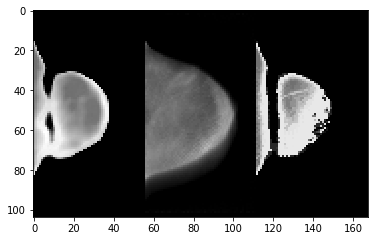

In [89]:
#index = random.randint(0, 35)
#print(index)
slicenum = 38
#plt.imshow(np.concatenate([result[index, :, :, slicenum, 0], valx[index, :, :, slicenum, 0], valy[index, :, :, slicenum, 0]], axis=-1), cmap='gray')
plt.imshow(np.concatenate([result[index, :, :, slicenum, 0], valx[index, :, :, slicenum, 0], valy[index, :, :, slicenum, 0]], axis=-1), cmap='gray')

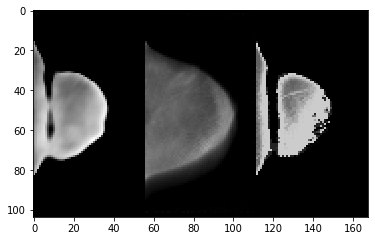

In [90]:
plt.imshow(np.concatenate([result1[index, :, :, slicenum, 0], valx[index, :, :, slicenum, 0], valy[index, :, :, slicenum, 0]], axis=-1), cmap='gray')

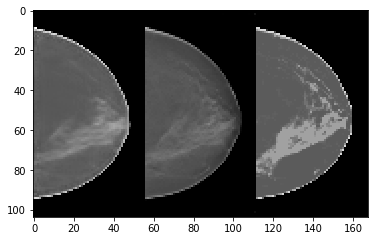

In [56]:
index = random.randint(0, 35)
print(index)
plt.imshow(np.concatenate([result[index, :, :, 20, 0], valx[index, :, :, 20, 0], valy[index, :, :, 20, 0]], axis=-1), cmap='gray')

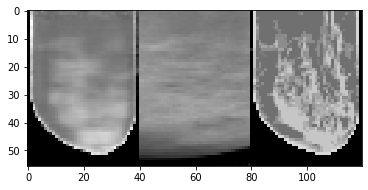

In [73]:
index = random.randint(0, 35)
plt.imshow(np.concatenate([result[index, 50, :, :, 0], valx[index, 50, :, :, 0], valy[index, 50, :, :, 0]], axis=-1), cmap='gray')